Keras API Project 

Our Goal
Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_info=pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [4]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

Section 1: Exploratory Data Analysis

OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data

<AxesSubplot:xlabel='loan_status', ylabel='count'>

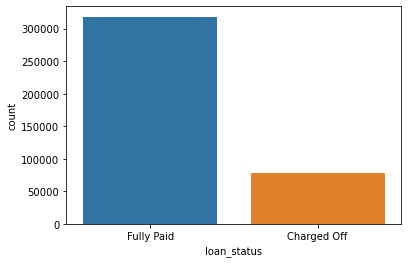

In [6]:
sns.countplot(x='loan_status',data=df)

C:\Users\avaz9\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 40000.0)

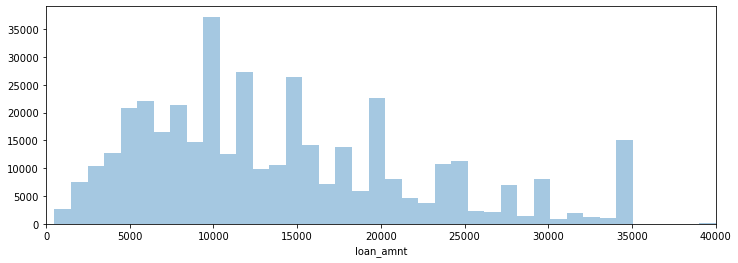

In [7]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=False,bins=40)
plt.xlim(0,40000)

In [8]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


(10.0, 0.0)

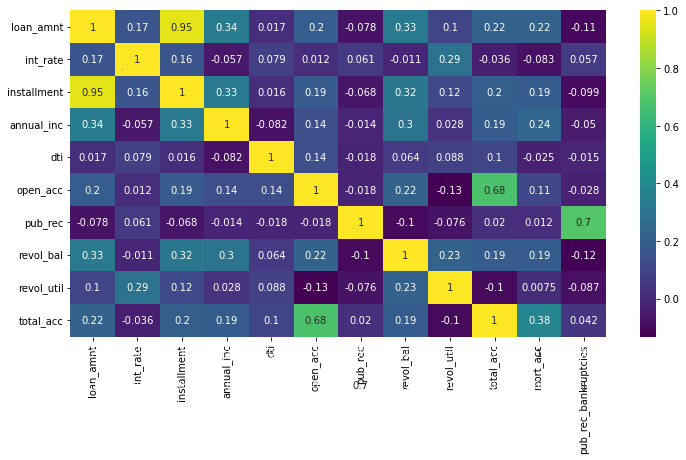

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.ylim(10,0)

we noticed almost perfect correlation with the "installment" feature. Explore this feature further by printing out their descriptions and perform a scatterplot between them.

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

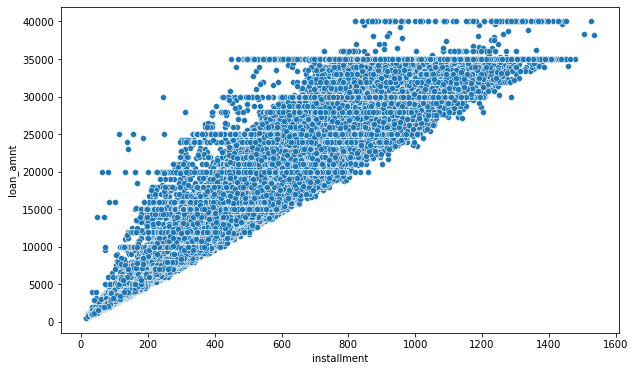

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='installment',y='loan_amnt',data=df,)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

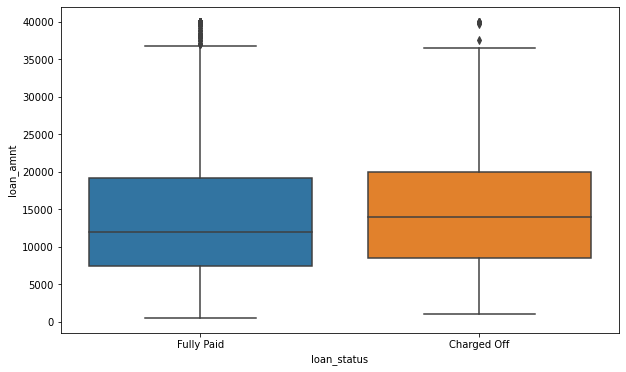

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [12]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


Exploring the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?

In [13]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [14]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<AxesSubplot:xlabel='grade', ylabel='count'>

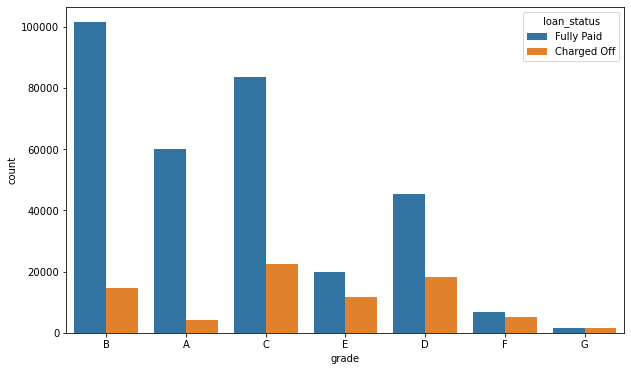

In [15]:
#Creating a countplot per grade
plt.figure(figsize=(10,6))
sns.countplot(x='grade',data=df,hue='loan_status')

(0.0, 30000.0)

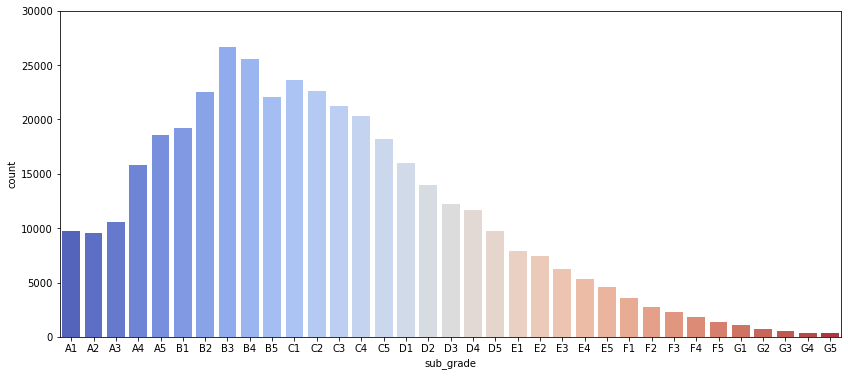

In [16]:
#Displaying a count plot per subgrade.
plt.figure(figsize=(14,6))
subgrade_order=sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=subgrade_order,palette='coolwarm')
plt.ylim(0,30000)

(0.0, 30000.0)

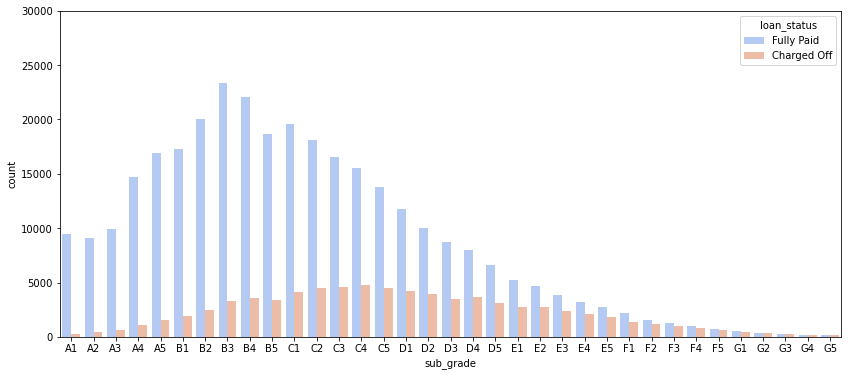

In [17]:
#Creating a 
plt.figure(figsize=(14,6))
subgrade_order=sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=subgrade_order,palette='coolwarm',hue='loan_status')
plt.ylim(0,30000)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

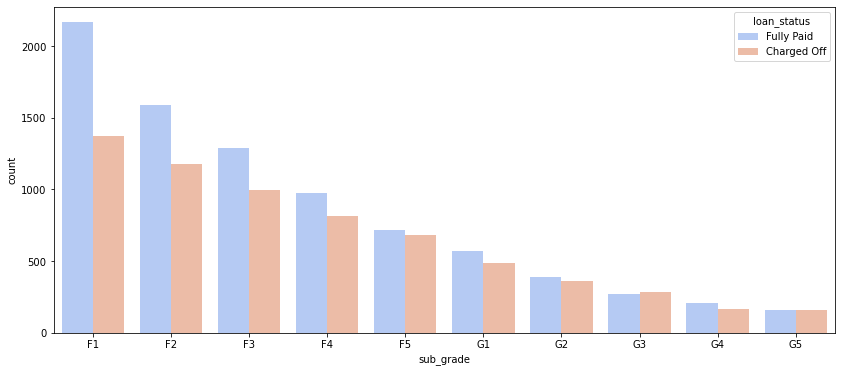

In [18]:
f_and_g=df[(df['grade']=='G') | (df['grade']=='F')]
plt.figure(figsize=(14,6))
subgrade_order=sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order=subgrade_order,palette='coolwarm',hue='loan_status')


After Isloating those and recreate the countplot just for those subgrades.It looks like F and G subgrades don't get paid back that often.

In [19]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

Creating a new column called 'load_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".

In [20]:
df['loan_repaid']=df['loan_status'].map({'Fully Paid':1,'Charged Off':0})


In [21]:
df[['loan_repaid','loan_status']]


,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<AxesSubplot:>

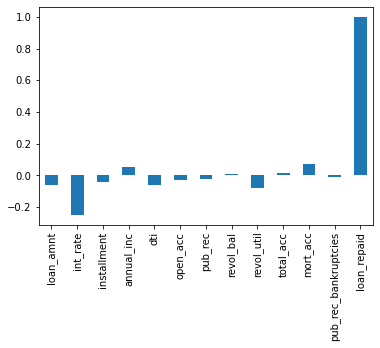

In [22]:
df.corr()['loan_repaid'].plot(kind='bar')

Create a bar plot showing the correlation of the numeric features to the new loan_repaid column

<AxesSubplot:>

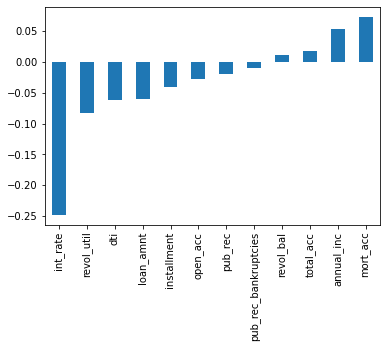

In [23]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

Section 2:  Data PreProcessing

Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.

In [24]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


Missing Data

Exploring this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.

In [25]:
len(df)

396030

In [26]:
#Creating a Series that displays the total count of missing values per column.
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [27]:
#Converting this Series to be in term of percentage of the total DataFrame
100*df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [28]:
# How many unique employment job titles are there?
df['emp_title'].nunique()

173105

In [29]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.

In [30]:
df=df.drop('emp_title',axis=1)

In [31]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [32]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

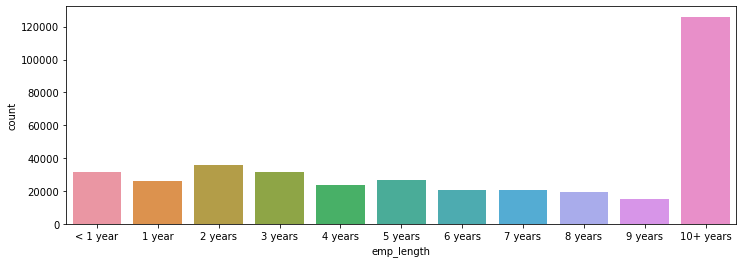

In [33]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

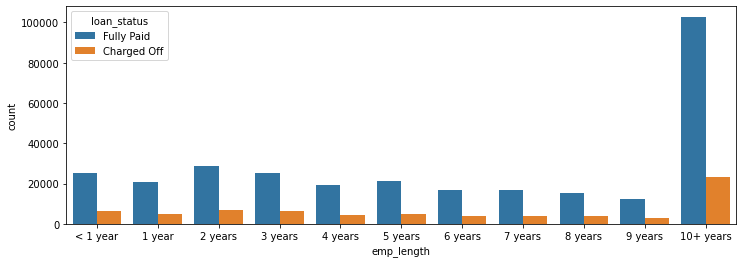

In [34]:
#Plot out the countplot with a hue separating Fully Paid vs Charged Off
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')

This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series. Once you've created it, see if visualize it with a bar plot. This may be tricky, refer to solutions if you get stuck on creating this Series.

In [35]:
emp_co=df[df['loan_status']=='Charged Off'].groupby("emp_length").count()['loan_status']

In [36]:
emp_fp=df[df['loan_status']=='Fully Paid'].groupby("emp_length").count()['loan_status']

In [37]:
#Percent of people that charged off versus fully paid
emp_co/emp_fp

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

In [38]:
#Actual percent of per category
emp_len=emp_co/(emp_co+emp_fp)

<AxesSubplot:xlabel='emp_length'>

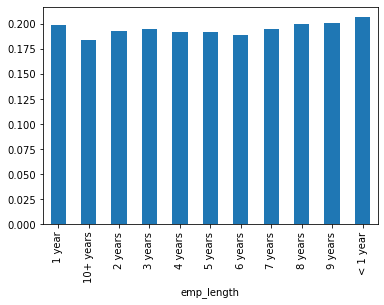

In [39]:
emp_len.plot(kind='bar')

People who worked 10 years are less charged off than others

In [40]:
#Charge off rates are extremely similar across all employment lengths and can be dropped the emp_length column.
df=df.drop('emp_length',axis=1)


In [41]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [42]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [43]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [44]:
df=df.drop('title',axis=1)

In [45]:
#Creating a value_counts of the mort_acc column.
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns

Reviewing the other columsn to see which most highly correlates to mort_acc

In [46]:
print("Correlation with the mort_acc column")
df.corr()['mort_acc'].sort_values()

Correlation with the mort_acc column


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry.

In [47]:
print("Mean of mort_acc column per total_acc")
df.groupby('total_acc').mean()['mort_acc']

Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns.

In [48]:
total_acc_avg=df.groupby('total_acc').mean()['mort_acc']

In [49]:
def fill_mort_acc(total_acc,mort_acc):
    
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc 

Accepts the total_acc and mort_acc values for the row.
Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value for the corresponding total_acc value for that row.
total_acc_avg here should be a Series or dictionary containing the mapping of the
groupby averages of mort_acc per total_acc values.

In [50]:
df['mort_acc']=df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [51]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [52]:
df=df.dropna()

In [53]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64


Categorical Variables and Dummy Variables

We just need to deal with the string values due to the categorical columns.

Listing all the columns that are currently non-numeric. 

In [54]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [55]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [56]:
df['term']=df['term'].apply(lambda term:int(term[:3]))

In [57]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [58]:
# We already know grade is part of sub_grade, so just drop the grade feature.
df=df.drop('grade',axis=1)

In [59]:
dummies=pd.get_dummies(df['sub_grade'],drop_first=True)

df=pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1)

In [60]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

verification_status, application_type,initial_list_status,purpose 

Converting these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. 

In [61]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)


Home_ownership

Review the value_counts for the home_ownership column.

In [62]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

Converting these to dummy variables, but replace NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe.

In [63]:
df['home_ownership']=df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [64]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [65]:
dummies=pd.get_dummies(df['home_ownership'],drop_first=True)

df=pd.concat([df.drop('home_ownership',axis=1),dummies],axis=1)

Address

Featuring engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.

In [66]:
df['zip_code']=df['address'].apply(lambda address:address[-5:])

In [67]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [68]:
dummies=pd.get_dummies(df['zip_code'],drop_first=True)

df=pd.concat([df.drop('zip_code',axis=1),dummies],axis=1)

In [69]:
df=df.drop('address',axis=1)

issue_d

This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.

In [70]:
df = df.drop('issue_d',axis=1)

earliest_cr_line

This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.

In [71]:
df['earliest_cr_line']=df['earliest_cr_line'].apply(lambda date: int(date[-4:]))


In [72]:
df['earliest_cr_line'].value_counts

<bound method IndexOpsMixin.value_counts of 0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 395219, dtype: int64>

Train Test Split

Import train_test_split from sklearn.

In [73]:
from sklearn.model_selection import train_test_split

Droping the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.

In [74]:
df=df.drop('loan_status',axis=1)

In [75]:
x=df.drop('loan_repaid',axis=1).values
y=df['loan_repaid'].values

In [76]:
 X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
    

Normalizing the Data

Use a MinMaxScaler to normalize the feature data X_train and X_test

In [77]:
from sklearn.preprocessing import MinMaxScaler

In [78]:
scaler = MinMaxScaler()

In [79]:
X_train = scaler.fit_transform(X_train)

In [80]:
X_test = scaler.transform(X_test)

In [81]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

Creating the Model

Building a sequential model to will be trained on the data.

In [82]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw


# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [83]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
1236/1236 [==============================] - 6s 3ms/step - loss: 0.3012 - val_loss: 0.2653
Epoch 2/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2658 - val_loss: 0.2637
Epoch 3/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2633 - val_loss: 0.2629
Epoch 4/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2620 - val_loss: 0.2625
Epoch 5/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2612 - val_loss: 0.2620
Epoch 6/25
1236/1236 [==============================] - 8s 6ms/step - loss: 0.2610 - val_loss: 0.2619
Epoch 7/25
1236/1236 [==============================] - 8s 6ms/step - loss: 0.2605 - val_loss: 0.2619
Epoch 8/25
1236/1236 [==============================] - 8s 6ms/step - loss: 0.2601 - val_loss: 0.2619
Epoch 9/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2600 - val_loss: 0.2614
Epoch 10/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.259

Evaluating Model Performance.

In [85]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

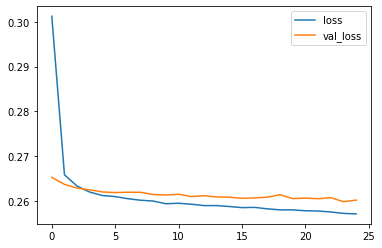

In [87]:
losses[['loss','val_loss']].plot()

Creating predictions from the X_test set and display a classification report and confusion matrix for the X_test set.

In [88]:
from sklearn.metrics import classification_report,confusion_matrix

In [90]:
predictions =(model.predict(X_test) > 0.5).astype(int)

2471/2471 [==============================] - 2s 941us/step


In [91]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [92]:
print(confusion_matrix(y_test,predictions))

[[ 6922  8736]
 [  148 63238]]


Given the customer below, would you offer this person a loan?

In [93]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt               25000.00
term                       60.00
int_rate                   18.24
installment               638.11
annual_inc              61665.00
dti                        30.11
earliest_cr_line         1996.00
open_acc                   16.00
pub_rec                     0.00
revol_bal               27778.00
revol_util                 65.50
total_acc                  46.00
mort_acc                    0.00
pub_rec_bankruptcies        0.00
A2                          0.00
A3                          0.00
A4                          0.00
A5                          0.00
B1                          0.00
B2                          0.00
B3                          0.00
B4                          0.00
B5                          0.00
C1                          0.00
C2                          0.00
C3                          0.00
C4                          0.00
C5                          0.00
D1                          0.00
D2                          0.00
D3        

In [102]:
model.predict(new_customer.values.reshape(1,60))

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)

In [103]:
# Now check, did this person actually end up paying back their loan?
df.iloc[random_ind]['loan_repaid']

1.0